In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np

In [34]:
#Loading Data
mails = pd.read_csv('spam.csv', encoding ='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
#Remove unwanted columns
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace=True)
#Rename column names
mails.rename(columns = {'v1': 'labels', 'v2': 'messages'}, inplace = True)
mails.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
#Replace ham by 0 and spam by 1
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.drop(['labels'], axis=1, inplace =True)
mails.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [39]:
totalMails = len(mails)
trainIndex, testIndex = list(), list()
for i in range(totalMails):
    if np.random.uniform(0,1) < 0.7:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [41]:
print(len(trainData))
print(len(testData))

3966
1606


In [43]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)

testData.reset_index(inplace = True)
testData.drop(['index'], axis =1, inplace = True)

In [44]:
trainData['label'].value_counts()

0    3435
1     531
Name: label, dtype: int64

In [46]:
testData['label'].value_counts()

0    1390
1     216
Name: label, dtype: int64

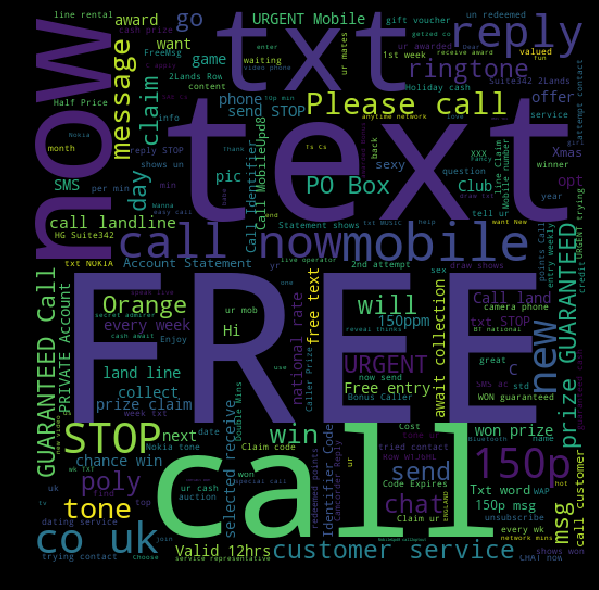

In [51]:
#Visualizing data
#most repeated words in spam messages

spam_words = ' '.join(list(mails[mails['label'] == 1]['messages']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(tpad=0)
plt.show()

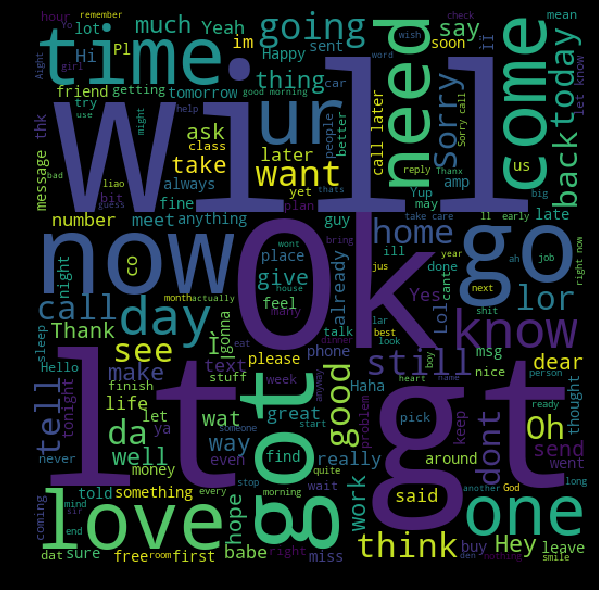

In [52]:
#most repeated words in ham messages

ham_words = ' '.join(list(mails[mails['label'] == 0]['messages']))
ham_wc = WordCloud(width = 512, height = 512).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [64]:
#Train the model
#Bag of words
#Stemming
def process_message(message, lower_case = True, stem = True, stop_words = True, gram =2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words

In [89]:
process_message(testData['messages'][1], gram = 1)

['freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv']